# Load the `Jirachi.jl` package
- if you have installed the packages in your own `julia` env, then you can load `Jirachi.jl` by:
  - ```push!(LOAD_PATH, "../../lib_julia_external/Jirachi")```

- it may take a fews seconds to precompile the package for the first time we load it, be patient.

In [43]:
# load Jirachi.jl
push!(LOAD_PATH, "../../lib_julia_external/Jirachi")
using Jirachi

#load package for plotting.
using CairoMakie
using MakiePublication

# Load light curves

- we use `lightcurve` structure to save the light curves
- elements can be assessed via `lc.time`, `lc.flux`, `lc.err`.

In [44]:
i_lc = load_data("./data/i_4395.txt", [1, 2, 3]; band="i")
z_lc = load_data("./data/z_4395.txt", [1, 2, 3]; band="z")

# convert time to second, and start it from 0 second.
i_lc.time = i_lc.time .- i_lc.time[1]
i_lc.time = round.(i_lc.time * 24 * 3600, digits=2)

z_lc.time = z_lc.time .- z_lc.time[1]
z_lc.time = round.(z_lc.time * 24 * 3600, digits=2)



230-element Vector{Float64}:
     0.0
   103.68
   207.36
   311.04
   414.72
   518.4
   622.08
   725.76
   829.44
   933.12
     ⋮
 23060.16
 23163.84
 23267.52
 23371.2
 23474.88
 23578.56
 23673.6
 23777.28
 23880.96

## now get the light curves binned!
- you should input the bin size and where the bin start and end.

In [45]:
t_binsize = 103.68
lc_edges = bin_lc_edges(t_binsize, 0, 25000)

i_lc_bin = bin_light_curve(i_lc; lc_edges = lc_edges)
z_lc_bin = bin_light_curve(z_lc; lc_edges = lc_edges)
lc1_bin, lc2_bin = get_common_lc(i_lc_bin, z_lc_bin)

(Loading lightcurve, band used: i-band

	 Time: 
		 min time: 0.0
		 max time: 23846.4
		 mean cadence: 105.98
		 median cadence: 103.68
	 Flux: 
		 mean flux: 0.6
		 median flux: 0.6
	 Error: 
		 mean error: 0.0021504424778761065
		 median error: 0.002
, Loading lightcurve, band used: z-band

	 Time: 
		 min time: 0.0
		 max time: 23846.4
		 mean cadence: 105.98
		 median cadence: 103.68
	 Flux: 
		 mean flux: 0.47
		 median flux: 0.47
	 Error: 
		 mean error: 0.0025801828333785826
		 median error: 0.003
)

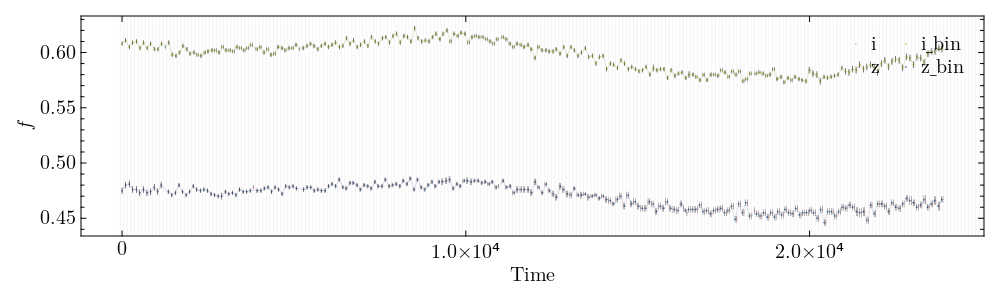

In [46]:
plotlc(i_lc, i_lc_bin, z_lc, z_lc_bin; label=[i_lc.band, i_lc.band * "_bin", z_lc.band, z_lc.band * "_bin"], lc_edges=lc_edges, save_fig_path="./fig/lc_check_i_z.svg", save_fig=true, hwratio=0.3)

In [47]:
# structure function 
sf_bin = 0.05
sf_bin_edges = 0:sf_bin:5 # in log space
mode = "both" # lc bootstrapped for structure function error
nsim = 1000 # lc bootstrapped for structure function error
lower_bounds = [0, 0, 0, 0.001]
upper_bounds = [10, 2e4, 2, 0.1]
p0 = [1, 1e3, 1, 0.005]

t_fit = 10 .^ range(log10(1), log10(6e4), step=0.1)

# color variation
cv_bin = 0.1
cv_bin_edges = 0:cv_bin:5 # in log space
nsigma = 3
erron=true

# save all run results.
fi_np::String="./data/run_i_z.h5"


"./data/run_i_z.h5"

In [48]:
fit_sf1 = fitsf_mcmc(lc1_bin; nsim=nsim, lb = lower_bounds , ub = upper_bounds, sf_bin_edges=sf_bin_edges, p0=p0, mode = mode)
fit_sf2 = fitsf_mcmc(lc2_bin; nsim=nsim, lb = lower_bounds, ub = upper_bounds, sf_bin_edges=sf_bin_edges, p0=p0, mode = mode)

binsf1, binsf2 = fit_sf1.binsf, fit_sf2.binsf

par_1, par_1_err = fit_sf1.param, fit_sf1.param_err
par_2, par_2_err = fit_sf2.param, fit_sf2.param_err


t_break_1 = find_t_break(binsf1)
t_break_2 = find_t_break(binsf2)

itp1 = find_t_min(binsf1, par_1; t_fit=t_fit)
itp2 = find_t_min(binsf2, par_2; t_fit=t_fit)

t_min_1, sf_min_1 = itp1.t_min, itp1.sf_min
t_min_2, sf_min_2 = itp2.t_min, itp2.sf_min

t_fit_1, sf_fit_1 = itp1.t_fit, itp1.sf_fit
t_fit_2, sf_fit_2 = itp2.t_fit, itp2.sf_fit


proper_time = [maximum([t_min_1, t_min_2]), minimum([t_break_1, t_break_2])]

 
[10.0, 13182.567385564074, 2.0, 0.1]
[1.0, 1000.0, 1.0, 0.005]
 
 
sigma: 0.52 +/- 0.03 
beta: 1.68 +/- 0.09 
tau: 9.19 +/- 1.32 
SF: 5.35 +/- 0.38 
 


 
[10.0, 13182.567385564074, 2.0, 0.1]
[1.0, 1000.0, 1.0, 0.005]
 
 
sigma: 0.68 +/- 0.03 
beta: 1.78 +/- 0.12 
tau: 13.08 +/- 2.75 
SF: 6.30 +/- 0.74 
 


2-element Vector{Float64}:
 3.481640891036401
 4.12

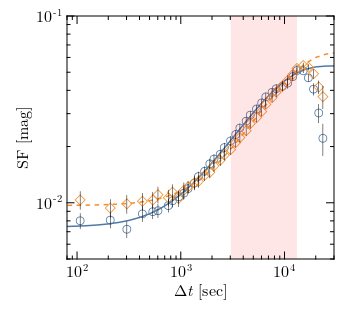

In [39]:

plotsf(binsf1, binsf2; fitsf1=[t_fit_1, sf_fit_1], fitsf2=[t_fit_2, sf_fit_2], proper_time = proper_time)

In [49]:
nsigma = nsigma
erron = erron

# cv in flux-Flux
cv_flux_res = color_variation(lc1_bin, lc2_bin, nsigma, erron, "flux")
cv_flux = cv_flux_res

bincv_flux = binned_color_variation(cv_flux, cv_bin_edges)

# cv in mag-mag
cv_mag_res = color_variation(lc1_bin, lc2_bin, nsigma, erron, "mag")
cv_mag = cv_mag_res

bincv_mag = binned_color_variation(cv_mag, cv_bin_edges)

binned_result([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95  …  4.05, 4.15, 4.25, 4.35, 4.45, 4.55, 4.65, 4.75, 4.85, 4.95], [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05  …  0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05], [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  1.0058952800258125, 1.0418722520378003, 1.1456921168637495, 1.2836195587704153, NaN, NaN, NaN, NaN, NaN, NaN], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0051803154346720375, 0.0068836854267073765, 0.009789991536768902, 0.021942340317344947, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float64[])

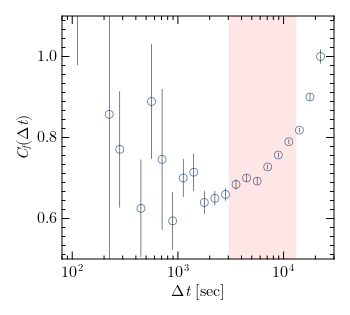

In [50]:
plotcv(bincv_flux; proper_time = proper_time)

In [14]:
res = runall(lc1_bin, lc2_bin; sf_bin_edges=sf_bin_edges, cv_bin_edges=cv_bin_edges, nsigma=nsigma, erron=erron, nsim=nsim, fi_np = fi_np , lower_bounds=lower_bounds, upper_bounds=upper_bounds, p0=[1, 1e3, 1, 0.005], mode=mode)


 
[10.0, 13182.567385564074, 2.0, 0.1]
[1.0, 1000.0, 1.0, 0.005]
 
 
sigma: 0.52 +/- 0.03 
beta: 1.67 +/- 0.09 
tau: 9.21 +/- 1.38 
SF: 5.33 +/- 0.39 
 


 
[10.0, 13182.567385564074, 2.0, 0.1]
[1.0, 1000.0, 1.0, 0.005]
 
 
sigma: 0.69 +/- 0.03 
beta: 1.77 +/- 0.12 
tau: 13.18 +/- 2.85 
SF: 6.39 +/- 0.77 
 
 
 

(sf = [0.03 0.02 NaN NaN; 0.08 0.02 NaN NaN; … ; 4.93 0.02 NaN NaN; 4.98 0.02 NaN NaN;;; 0.03 0.02 NaN NaN; 0.08 0.02 NaN NaN; … ; 4.93 0.02 NaN NaN; 4.98 0.02 NaN NaN], cv = [0.05 0.05 NaN 0.0; 0.15 0.05 NaN 0.0; … ; 4.85 0.05 NaN 0.0; 4.95 0.05 NaN 0.0;;; 0.05 0.05 NaN 0.0; 0.15 0.05 NaN 0.0; … ; 4.85 0.05 NaN 0.0; 4.95 0.05 NaN 0.0], fit = [1.0 0.007373881570092869; 1.2589254117941673 0.007373904144765531; … ; 39810.71705534977 0.053792576332625075; 50118.72336272725 0.053792857102606215;;; 1.0 0.0097008312984255; 1.2589254117941673 0.009700836858738297; … ; 39810.71705534977 0.06459179788439393; 50118.72336272725 0.06461848733292105], par = [0.05328506547586806 0.003931252435192943 … 0.005214087497955578 0.00030182906638481473;;; 0.0638869808246581 0.00774853169438437 … 0.006859515761817004 0.0003333099709858289], sf_min = [0.014747666510017552, 0.019401640443347242], t_min = [3.22784063639378, 3.4844129256093717], t_max = [4.12, 4.18], num_all = [103.68, 207.36, 103.68, 311.04, 20

In [16]:
res.cv

50×4×2 Array{Float64, 3}:
[:, :, 1] =
 0.05  0.05  NaN         0.0
 0.15  0.05  NaN         0.0
 0.25  0.05  NaN         0.0
 0.35  0.05  NaN         0.0
 0.45  0.05  NaN         0.0
 0.55  0.05  NaN         0.0
 0.65  0.05  NaN         0.0
 0.75  0.05  NaN         0.0
 0.85  0.05  NaN         0.0
 0.95  0.05  NaN         0.0
 ⋮                       
 4.15  0.05    0.821429  0.00485414
 4.25  0.05    0.904762  0.00784384
 4.35  0.05    1.0       0.0168877
 4.45  0.05  NaN         0.0
 4.55  0.05  NaN         0.0
 4.65  0.05  NaN         0.0
 4.75  0.05  NaN         0.0
 4.85  0.05  NaN         0.0
 4.95  0.05  NaN         0.0

[:, :, 2] =
 0.05  0.05  NaN        0.0
 0.15  0.05  NaN        0.0
 0.25  0.05  NaN        0.0
 0.35  0.05  NaN        0.0
 0.45  0.05  NaN        0.0
 0.55  0.05  NaN        0.0
 0.65  0.05  NaN        0.0
 0.75  0.05  NaN        0.0
 0.85  0.05  NaN        0.0
 0.95  0.05  NaN        0.0
 ⋮                      
 4.15  0.05    1.04469  0.00697745
 4.25  0.05 